## Metadados

Os dados foram obtidos a partir da plataforma [Kaggle](https://www.kaggle.com/), em um dataset público compilado por Arian Azmoudeh.

- **Fonte Principal:** [New York City Airbnb Open Data](https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata).

- **Fonte Original:** Os dados são derivados da iniciativa [Inside Airbnb](https://insideairbnb.com/explore/), que disponibiliza dados públicos sobre as listagens da plataforma em várias cidades do mundo.

### Sobre  o Airbnb

O Airbnb é uma plataforma que conecta pessoas que desejam alugar um espaço (como casas, apartamentos ou quartos) com viajantes em busca de acomodações temporárias. O serviço permite que anfitriões anunciem suas propriedades e que hóspedes reservem estadias, muitas vezes com preços mais acessíveis do que em hotéis tradicionais. 

### Sobre o Dataset

O dataset descreve a atividade de anúncios de acomodações na cidade de Nova York. As informações abrangem três áreas principais:

- **Anúncios (Listings):** Inclui descrições completas dos imóveis, localização geográfica (latitude e longitude), tipo de quarto, preço, regras da casa e informações sobre o anfitrião.
- **Avaliações (Reviews):** Contém dados sobre o número de avaliações, a data da última avaliação e a pontuação média das avaliações.
- **Disponibilidade (Calendar):** Informações sobre a disponibilidade do imóvel ao longo do ano (availability_365).

A escolha deste conjunto de dados se deve à sua riqueza de informações, que nos permite explorar diversas áreas do mercado de aluguel de curto prazo em Nova York.
Dentre as várias opções analisadas, este dataset se destacou por apresentar um cenário completo e realista para um projeto de Ciência de Dados: ele combina um grande volume de registros com desafios claros de tratamento e limpeza.

Uma análise preliminar já nos permitiu identificar diversos pontos de melhoria, que encaramos como oportunidades para demonstrar um fluxo de trabalho robusto. Ao invés de um dataset perfeitamente limpo, a necessidade de prepará-lo nos permite agregar mais valor e confiança à análise final. Objetivo é ir além da simples visualização de dados, buscando insights sobre como diferentes variáveis se relacionam e influenciam o ecossistema do Airbnb.

Entre as oportunidades de tratamento já identificadas, destacam-se:
- **Tratamento de Valores Ausentes:** Percebemos uma quantidade significativa de dados faltantes em colunas estratégicas como **"last review"** e **"reviews per month""** que precisarão de alguma estratégia de tratamento para que não perdemos informações valiosas.
- **Correção de Tipos de Dados:** Colunas cruciais para a análise, como **"price"** e **"service fee"**, estão com formato de texto por conta da utilização de caracteres especiais como **"$"**. A conversão para um formato númerico será necessária para análises futuras.
- **Agrupamento de Dados:** A coluna **"house_rules"**, mesmo com dados ausentes, pode ser transformada em uma variavel binária para associar em analises envolvendo avaliações e no próprio preço.

Por fim, a [fonte original](https://insideairbnb.com/data-assumptions/) nos traz algumas informações interessantes:

- O Airbnb torna anônimas algumas informações de localização de um anúncio. Isso significa que uma localização (com latitude e longitude) está num raio de 150m do endereço original. Assim, por exemplo, dois anúncios num mesmo edifício podem estar com latitudes e longitudes muito discrepantes.
- O nome do bairro em um anúncio é calculado a partir das suas coordenadas geográficas.

## Dicionário de dados

| Coluna | Descrição | Tipo |
| :- | :- | :- |
| id | identificador do anúncio | integer |
| NAME | nome do anúncio | VARCHAR(120) |
| host id | identificador do anfitrião | integer |
| host_identity_verified | indica se a identidade do anfitrião foi confirmada |  enum('unconfirmed', 'verified') |
| host name | nome do anfitrião. Em geral, só o primeiro nome. | VARCHAR(120) |
| neighbourhood group | indica qual é a região do bairro em que o anúncio está listado | VARCHAR(30) |
| neighbourhood | indica qual é o bairro em que está listado o anúncio | VARCHAR(30) |
| lat | latitude baseada no sistema WGS84 | numeric(2,5) |
| long | longitude baseada no sistema WGS84 | numeric(2,5) |
| country | indica qual é o país do anúncio. No caso, todos são 'United States'. | VARCHAR(30) |
| country code | código que indica o país do anúncio de acordo com a ISO 3166-1 alpha-2. No caso deste dataset, todos são 'US'. | CHAR(2) |
| instant_bookable | indica se o anúncio pode ser reservado instantemente | boolean |
| cancellation_policy | indica o nível de rigídez do cancelamento da reserva  | enum('strict', 'moderate', 'flexible') |
| room type | indica qual é o tipo de acomodação anunciada. Ex: 'Private room', 'Shared room', 'Hotel room' | VARCHAR(120) |
| Construction year | ano em que a propriedade foi construída | integer |
| price | preço da diária, com um cifrão na frente, e sem as casas decimais | VARCHAR(10) |
| service fee | taxa de serviço, com um cifrão na frente, e sem as casas decimais | VARCHAR(10) |
| minimum nights | número mínimo de dias de estadia | integer |
| number of reviews | número de avaliações que o anúncio tem | float |
| last review | data da última avaliação recebida pelo anúncio no formato mm/dd/aaaa | date |
| reviews per month | média de avaliações por mês | float |
| review rate number | nota média das avaliações | float |
| calculated host listings count | indica quantos anúncios o host tem | float |
| availability 365 | indica, para os próximos 365 dias, quantos deles estão com reserva disponível | float |
| house_rules | indica quais são as regras da acomodação | VARCHAR(500) |
| license | número de certificação do anúncio | VARCHAR(10) |


## Análise dos dados

A seguir, utilizaremos Python para auxiliar na análise dos dados brutos. Com a biblioteca [`Pandas`](https://pandas.pydata.org/), podemos visualizar e alterar os dados utilizando `Dataframes` e `Series`. Uma `Series` é um array unidimensional, e um `Dataframe` é como uma tabela, em que cada coluna é uma `Series`.  

Além dessas bibliotecas, também podemos usar a `seaborn` para desenhar gráficos com base nos dados das `Series` e `Dataframes`.

Primeiro, vamos visualizar o Dataframe gerado:

In [ ]:
import pandas as pd

file_path = './airbnb-dataset.csv'
df = pd.read_csv(file_path, encoding='utf8', low_memory=False)

df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


É este o dataframe original, que será alterado ao longo do projeto.

Agora, vamos verificar o tipo dos dados de cada coluna:

In [ ]:
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

É importante ressaltar que o `Pandas` usa a nomenclatura `object` tanto para strings quanto para tipos mistos. No caso, os valores das colunas com `object` são strings.

Agora, vamos observar alguns dados estatísticos do dataframe:

In [ ]:
df.describe(include="all")

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
count,1.025990e+05,102349,1.025990e+05,102310,102193,102570,102583,102591.000000,102591.000000,102067,...,102326,102190.000000,102416.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000,50468,2
unique,NaN,61281,NaN,2,13190,7,224,NaN,NaN,1,...,231,NaN,NaN,2477,NaN,NaN,NaN,NaN,1976,1
top,NaN,Home away from home,NaN,unconfirmed,Michael,Manhattan,Bedford-Stuyvesant,NaN,NaN,United States,...,$41,NaN,NaN,6/23/2019,NaN,NaN,NaN,NaN,#NAME?,41662/AL
freq,NaN,33,NaN,51200,881,43792,7937,NaN,NaN,102067,...,526,NaN,NaN,2443,NaN,NaN,NaN,NaN,2712,2
mean,2.914623e+07,NaN,4.925411e+10,NaN,NaN,NaN,NaN,40.728094,-73.949644,NaN,...,NaN,8.135845,27.483743,NaN,1.374022,3.279106,7.936605,141.133254,NaN,NaN
std,1.625751e+07,NaN,2.853900e+10,NaN,NaN,NaN,NaN,0.055857,0.049521,NaN,...,NaN,30.553781,49.508954,NaN,1.746621,1.284657,32.218780,135.435024,NaN,NaN
min,1.001254e+06,NaN,1.236005e+08,NaN,NaN,NaN,NaN,40.499790,-74.249840,NaN,...,NaN,-1223.000000,0.000000,NaN,0.010000,1.000000,1.000000,-10.000000,NaN,NaN
25%,1.508581e+07,NaN,2.458333e+10,NaN,NaN,NaN,NaN,40.688740,-73.982580,NaN,...,NaN,2.000000,1.000000,NaN,0.220000,2.000000,1.000000,3.000000,NaN,NaN
50%,2.913660e+07,NaN,4.911774e+10,NaN,NaN,NaN,NaN,40.722290,-73.954440,NaN,...,NaN,3.000000,7.000000,NaN,0.740000,3.000000,1.000000,96.000000,NaN,NaN
75%,4.320120e+07,NaN,7.399650e+10,NaN,NaN,NaN,NaN,40.762760,-73.932350,NaN,...,NaN,5.000000,30.000000,NaN,2.000000,4.000000,2.000000,269.000000,NaN,NaN


O comando **'df.describe(include='all')** é uma ferramenta de diagnóstico do pandas que gera um resumo estatístico completo de todas as colunas de um DataFrame, tanto as numéricas quanto as textuais. Ao aplicá-lo em nosso conjunto de dados, obtivemos um panorama imediato da qualidade dos dados, o que nos permitiu identificar diversos pontos candidatos para a etapa de limpeza(camada Silver).

Constatamos que colunas essenciais como **price** e **service fee** estão formatadas incorretamente como texto, e não como números. 
Além disso, a análise expôs erros claros, como um valor mínimo impossível de -10 para a coluna **availability_365**, e outliers extremos em **minimum_nights**. 
Por fim, o resumo quantificou a alta incidência de dados ausentes em colunas como **last_review** e **house_rules**, fornecendo um roteiro claro para as próximas etapas de tratamento do dataset.

## Quantidade de registros

Observamos que existem 102599 registros no dataset:

In [ ]:
number_of_rows = len(df)
number_of_rows, number_of_columns = df.shape

print(f"Número de tuplas: {number_of_rows}")
print(f"Número de colunas: {number_of_columns}")

Número de tuplas: 102599
Número de colunas: 26


## Valores nulos 

Observamos que todos os registros tem pelo menos um valor nulo no dataset:

In [ ]:
number_of_rows_with_null_values = len(df.isnull().any(axis=1))
print(f"Número de valores nulos: {number_of_rows_with_null_values}")

Número de valores nulos: 102599


Agora, vamos verificar, coluna por coluna, quantos valores nulos tem em cada uma delas.

In [ ]:
number_of_nulls_per_column = df.isnull().sum().sort_values(ascending=False)
number_of_nulls_per_column

license                           102597
house_rules                        52131
last review                        15893
reviews per month                  15879
country                              532
availability 365                     448
minimum nights                       409
host name                            406
review rate number                   326
calculated host listings count       319
host_identity_verified               289
service fee                          273
NAME                                 250
price                                247
Construction year                    214
number of reviews                    183
country code                         131
instant_bookable                     105
cancellation_policy                   76
neighbourhood group                   29
neighbourhood                         16
long                                   8
lat                                    8
id                                     0
host id         

Vamos desenhar um gráfico para uma análise visual:

/tmp/ipykernel_131317/3399404412.py:7: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


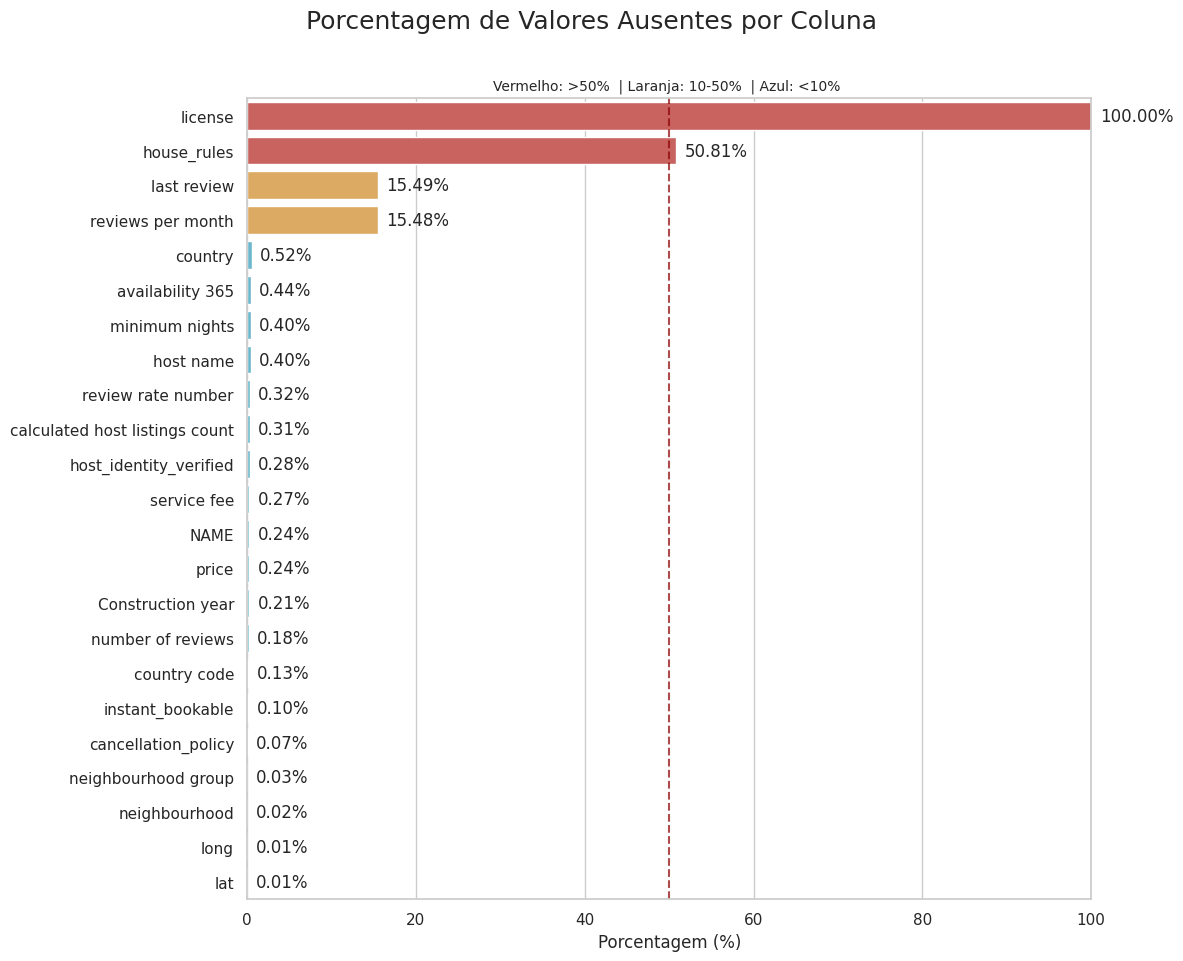

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'df' já foi carregado
file_path = './airbnb-dataset.csv'
df = pd.read_csv(file_path, low_memory=False)

# 1. Calcular a porcentagem de nulos
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage = null_percentage[null_percentage > 0].sort_values(ascending=False)

# 2. Definir as cores com base em um threshold (aqui está a análise extra)
colors = []
red = '#d9534f'
orange = '#f0ad4e'
blue = '#5bc0de'
for val in null_percentage.values:
    if val > 50:
        colors.append(red) 
    elif val > 10:
        colors.append(orange) 
    else:
        colors.append(blue) 

# 3. Configurar o estilo e o tamanho do gráfico
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 10))

# 4. Criar o gráfico, passando a lista de cores para a paleta
ax = sns.barplot(x=null_percentage.values, y=null_percentage.index, palette=colors, hue=null_percentage.index, legend=False)

# 5. Adicionar um título e um subtítulo explicativo
plt.suptitle("Porcentagem de Valores Ausentes por Coluna", fontsize=18, y=0.96)
ax.set_title("Vermelho: >50%  | Laranja: 10-50%  | Azul: <10% ", fontsize=10)
ax.set_xlabel("Porcentagem (%)", fontsize=12)
ax.set_ylabel("")
ax.set_xlim(0, 100)

# 6. Adicionar as anotações numéricasS
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height() / 2, f'{width:.2f}%', va='center')

# 7. (Opcional) Adicionar uma linha vertical para destacar um limite
ax.axvline(50, color='darkred', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Ajusta o layout para o suptitle
plt.show()

Observemos algumas colunas com dados interessantes: 

- **license**: A coluna license tem apenas 2 registros que não vem com valor nulo. Todos os outros são nulos. O que torna esse campo tão importante? Por que a esmagadora maioria não precisa de uma licensa? E por que especificamente 2 anúncios tem? Existe algo que torna esses anúncios diferentes dos demais?
- **house_rules**: A coluna house_rules tem quase metade dos seus valores como nulos. Ou seja: metade dos aluguéis não vêm com regras explícitas.
- **last review**: mais de 80% dos anúncios teve pelo menos uma avaliação.
- **country** e **country code**: embora saibamos que os dados se referem sempre à cidade de Nova York, ainda assim existem registros que não indicam que o país do anúncio é os Estados Unidos.
- **id** e **name**: nenhum dos registros não tem identificador. No entanto, ainda existem registros que não tem nome (embora sejam de quantidade quase desprezível). O que levanta a pergunta: o site do airbnb permitiu anúncios sem nome? Ou houve falha no momento da extração dos dados?
- **long**, **lat**, **neighbourhood** e **neighbourhood group**: apenas 8 registros não tem latitude e longitude, mas o dobro de registros não pertence a nenhum bairro, e quase o triplo não pertence a nenhum grupo de bairro. Isso é importante porque `neighbourhood` e `neighbourhood group` são gerados a partir dos valores de latitude e longitude. Se apenas 8 registros não têm esses valores, por que 16 não tem bairro definido e 29 não tem um grupo de bairro definido?
- **price**: pouquíssimos registros não tem um preço definido. Como alguém faria um aluguel sem saber por quanto seria?

A seguir, verificaremos alguns dados específicos de algumas colunas.

## Grupos de bairros com anúncios

In [ ]:
neighbourhoods = df['neighbourhood'].unique()

neighbourhood_groups

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

Ao inspecionar os grupos de bairros, percebemos que existem 7 categorias únicas (além dos valores nulos). No entanto, identificamos uma inconsistência clara nos dados:

- O grupo de bairro `'brookln'` deveria claramente ser `'Brooklyn'`.
- Da mesma forma, `'manhatan'` deveria ser `'Manhattan'`.

O gráfico de barras a seguir, gerado com os dados brutos, ilustra visualmente esse problema. Essa correção será aplicada em uma etapa posterior de tratamento dos dados para garantir a integridade da análise.

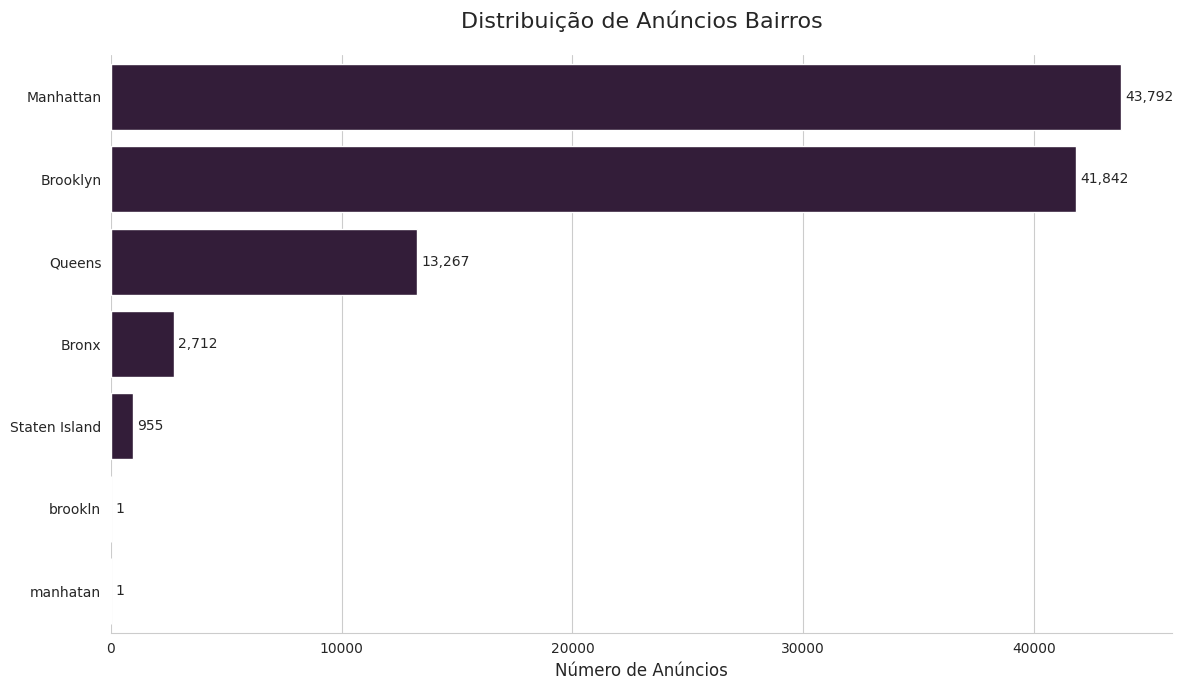

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Certifique-se de que o caminho para o arquivo CSV está correto
file_path = './airbnb-dataset.csv'
df = pd.read_csv(file_path, encoding='utf8', low_memory=False)

# --- Geração do Gráfico com Dados Brutos ---

# Definimos o estilo e a paleta de cores
sns.set_style("whitegrid")
sns.set_palette("rocket") # Usando outra paleta para diferenciar

# Criamos a figura e os eixos do gráfico
plt.figure(figsize=(12, 7))

# Criamos a ordem das barras com base nos dados originais
# Note que 'brookln' e 'manhatan' aparecerão como categorias separadas
order = df['neighbourhood group'].value_counts().index

# Criamos o gráfico de contagem (countplot) com os dados brutos
ax = sns.countplot(
    y=df['neighbourhood group'],
    order=order
)

# --- Anotações e Melhorias no Gráfico ---

# Adicionamos os valores exatos no final de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', padding=3, fontsize=10)

# Configuramos títulos e rótulos, indicando que são dados brutos
ax.set_title('Distribuição de Anúncios Bairros', fontsize=16, pad=20)
ax.set_xlabel('Número de Anúncios', fontsize=12)
ax.set_ylabel('')

# Removemos as bordas de cima e da direita para um visual mais limpo
sns.despine(left=True)

# Ajusta o layout para evitar que os elementos se sobreponham
plt.tight_layout()

# Exibir o gráfico
plt.show()

## Países e códigos de países

In [ ]:
countries = df['country'].unique()
country_codes = df['country code'].unique()

print(countries)
print(country_codes)

['United States' nan]
['US' nan]


Ao investigar as colunas `country` e `country code`, confirmamos que todos os registros preenchidos contêm o mesmo valor ('United States' e 'US', respectivamente).

Visto que o escopo do dataset se limita à cidade de Nova York, a informação de país é redundante e não agrega valor para diferenciar os anúncios. Por essa razão, julgamos que essas colunas não serão necessárias para os próximos passos do projeto e podem ser candidatas à remoção na etapa de limpeza.

Antes de prosseguir, vamos apenas quantificar a presença de valores ausentes (`NaN`) nestas colunas como parte da avaliação de qualidade dos dados.

In [3]:
import pandas as pd

# Supondo que o df já está carregado
file_path = './airbnb-dataset.csv'
df = pd.read_csv(file_path, encoding='utf8', low_memory=False)

# --- Análise de Valores Ausentes para as colunas de País ---

# Total de registros no DataFrame
total_records = len(df)

# Análise para a coluna 'country'
country_null_count = df['country'].isnull().sum()
country_null_percentage = (country_null_count / total_records) * 100

# Análise para a coluna 'country code'
country_code_null_count = df['country code'].isnull().sum()
country_code_null_percentage = (country_code_null_count / total_records) * 100

# Exibindo os resultados de forma clara
print("Análise da Coluna 'country':")
print(f"  - Registros ausentes (NaN): {country_null_count:,.0f}")
print(f"  - Porcentagem de ausentes: {country_null_percentage:.2f}%\n")

print("Análise da Coluna 'country code':")
print(f"  - Registros ausentes (NaN): {country_code_null_count:,.0f}")
print(f"  - Porcentagem de ausentes: {country_code_null_percentage:.2f}%")

Análise da Coluna 'country':
  - Registros ausentes (NaN): 532
  - Porcentagem de ausentes: 0.52%

Análise da Coluna 'country code':
  - Registros ausentes (NaN): 131
  - Porcentagem de ausentes: 0.13%


## Políticas de cancelamento

In [ ]:
cancellation_policies = df['cancellation_policy'].unique()
cancellation_policies

array(['strict', 'moderate', 'flexible', nan], dtype=object)

Para cancelar uma reserva, sabemos que as regras para fazê-lo podem ser "estritas", "moderadas" ou "flexíveis". No entanto, não sabemos o que isso significa. O que quer dizer que as regras para cancelar um quarto são flexíveis? Qual a diferença de flexível para moderada?

O Gráfico abaixo visa demonstrar a distribuição das políticas de cancelamento entre os anúncios.

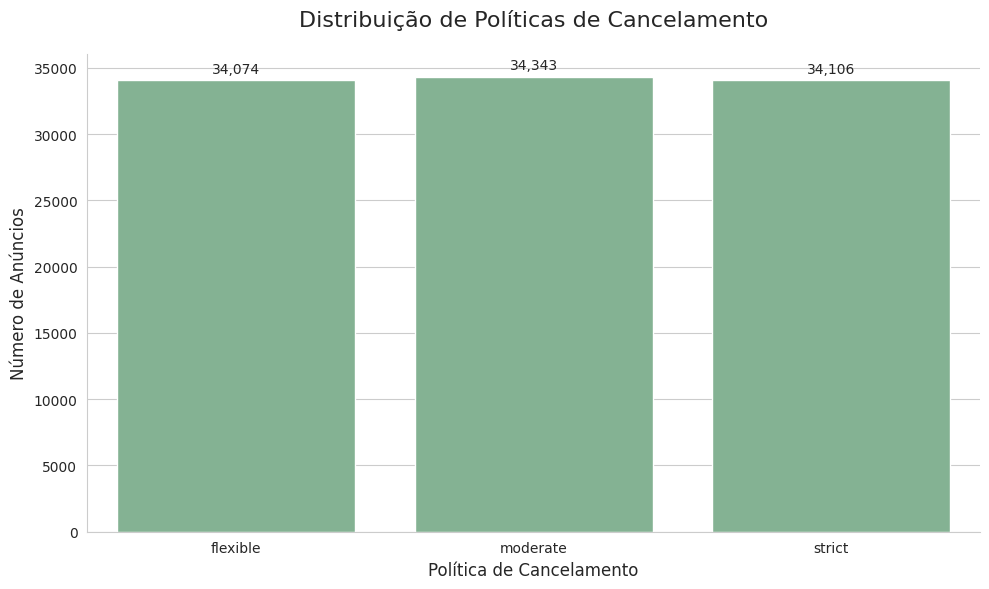

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que o df já está carregado
file_path = './airbnb-dataset.csv'
df = pd.read_csv(file_path, encoding='utf8', low_memory=False)

# --- Geração do Gráfico para Políticas de Cancelamento ---

# Definimos o estilo e a paleta
sns.set_style("whitegrid")
sns.set_palette("crest") # Paleta com tons de verde/azul

# Criamos a figura e os eixos
plt.figure(figsize=(10, 6))

# Definimos uma ordem lógica para as políticas
logical_order = ['flexible', 'moderate', 'strict']

# Criamos o gráfico de contagem (countplot)
ax = sns.countplot(
    x=df['cancellation_policy'],
    order=logical_order # Aplicamos a ordem lógica
)

# --- Anotações e Melhorias ---

# Adicionamos os valores exatos no topo de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', padding=3, fontsize=10)

# Configuramos títulos e rótulos
ax.set_title('Distribuição de Políticas de Cancelamento', fontsize=16, pad=20)
ax.set_xlabel('Política de Cancelamento', fontsize=12)
ax.set_ylabel('Número de Anúncios', fontsize=12)

# Removemos as bordas de cima e da direita
sns.despine()

# Ajusta o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

## Tipos de quartos

In [ ]:
room_types = df['room type'].unique()

room_types

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

Existem, interessantemente, apenas quatro tipos de acomodações disponíveis para reserva: **Quarto Privado**, **Casa/Apto Inteiro**, **Quarto Compartilhado** e **Quarto de Hotel**. 

O gráfico a seguir demonstra a distribuição percentual entre esses tipos.


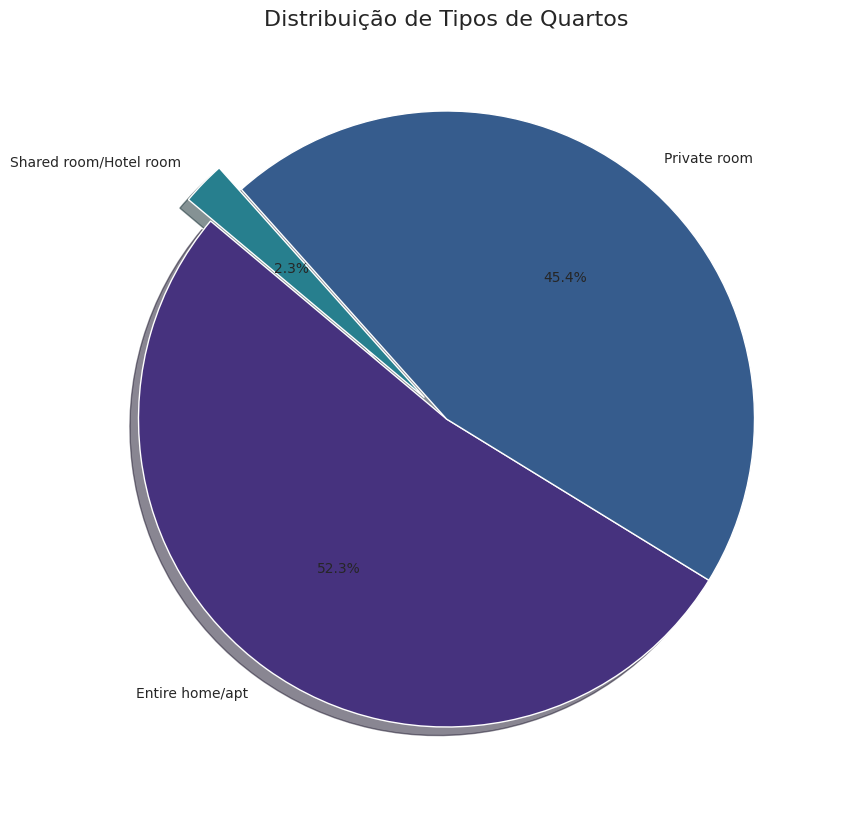

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Certifique-se de que o caminho para o arquivo CSV está correto
file_path = './airbnb-dataset.csv'
df = pd.read_csv(file_path, encoding='utf8', low_memory=False)

# --- 1. Agrupar os dados ---
# Criamos uma cópia da coluna para não alterar o DataFrame original
df['room_type_grouped'] = df['room type']

# Substituímos 'Shared room' e 'Hotel room' pela nova categoria 'Outros'
df['room_type_grouped'] = df['room_type_grouped'].replace({
    'Shared room': 'Shared room/Hotel room',
    'Hotel room': 'Shared room/Hotel room'
})

# Contamos a frequência das novas categorias
room_type_counts = df['room_type_grouped'].value_counts()


# --- 2. Configurar o Seaborn ---
sns.set_style("whitegrid") # Define um fundo branco com grades
sns.set_palette("viridis") # Define uma paleta de cores agradável


# --- 3. Gerar o gráfico ---
# Prepara o 'explode' para destacar a fatia 'Outros'
labels = room_type_counts.index
explode_values = [0.1 if label == 'Shared room/Hotel room' else 0 for label in labels]

plt.figure(figsize=(10, 10))

# A função `pie` retorna os objetos do gráfico: fatias, textos dos rótulos e textos das porcentagens
wedges, texts, autotexts = plt.pie(
    room_type_counts,
    autopct='%1.1f%%', # Formato da porcentagem
    startangle=140,
    explode=explode_values,
    shadow=True,
    labels=labels
)




plt.title('Distribuição de Tipos de Quartos', fontsize=16)
plt.ylabel('')

# Exibir o gráfico
plt.show()